# 📘 Aula 4 – Atividade Prática

![](../../data/imagem/banner-pos-2022.jpg)


## Classificação de Dedos em Imagens de Mãos - Desafio de Desenvolvimento

Neste notebook, você irá construir e aprimorar um modelo de deep learning para classificar quantos dedos (0-5) estão sendo mostrados em imagens de mãos, ignorando a distinção entre mão esquerda e direita. Siga as orientações em cada seção e complete os códigos onde indicado.

**Dataset**

* 21.600 imagens de mãos (128x128 pixels)
    * Conjunto de treino: 18.000 imagens
    * Conjunto de teste: 3.600 imagens
* Cada imagem tem um rótulo indicando o número de dedos (0-5) nos últimos caracteres do nome do arquivo



# 1. Configuração Inicial e Exploração dos Dados

**Objetivo**: Preparar o ambiente e entender a estrutura dos dados.

**Tarefas:**

* Complete os valores faltantes nas configurações
* Verifique se o caminho do dataset está correto
* Explore a estrutura dos diretórios (quantas pastas? como estão organizadas?)

In [8]:
# TODO: Importe todas as bibliotecas necessárias
# Dica: Você precisará de tensorflow/keras, pandas, numpy, matplotlib, seaborn
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Configurações iniciais
IMAGE_SIZE = (128, 128)                  # Complete com o tamanho adequado
BATCH_SIZE = 32                          # Defina um batch size razoável
EPOCHS = 10                              # Comece com 20 épocas
DATASET_PATH = "../../data/fingers"      # Complete com o caminho correto

# TODO: Liste os arquivos no diretório do dataset
# Dica: Use os.listdir() para verificar a estrutura de pastas
try:
    print("Estrutura de diretórios:")
    print(os.listdir(DATASET_PATH))
    print("\nConteúdo da pasta train:")
    print(len(os.listdir(os.path.join(DATASET_PATH, 'train'))), "arquivos")
    print("\nConteúdo da pasta test:")
    print(len(os.listdir(os.path.join(DATASET_PATH, 'test'))), "arquivos")
except FileNotFoundError:
    print("Erro: Caminho do dataset incorreto. Verifique DATASET_PATH")

Estrutura de diretórios:
['test', 'train']

Conteúdo da pasta train:
18000 arquivos

Conteúdo da pasta test:
3600 arquivos


# 2. Pré-processamento e Criação dos DataFrames

**Objetivo:** Carregar os metadados das imagens e preparar para o treinamento.

**Tarefas:**

* Implemente a função extract_class corretamente
* Verifique se a distribuição de classes está balanceada
* Analise possíveis problemas de desbalanceamento

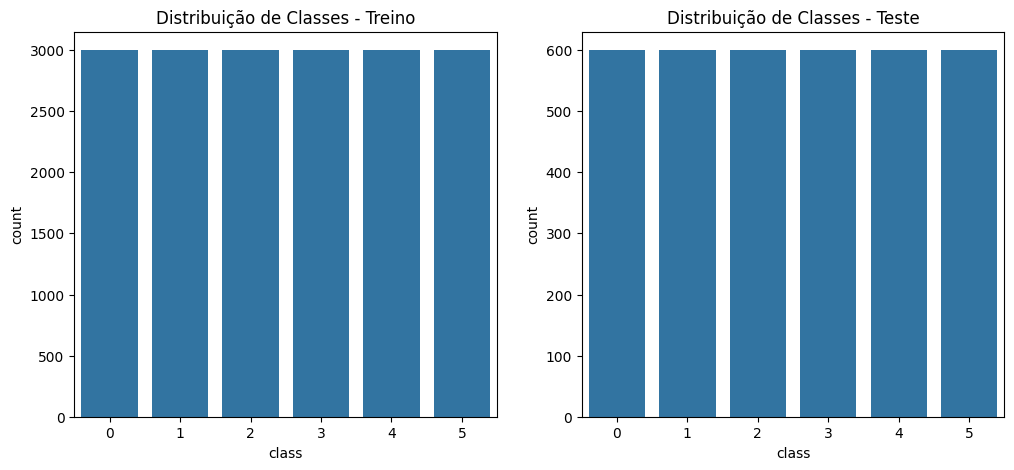

In [9]:
def extract_class(filename):
    """Extrai o número de dedos do nome do arquivo"""
    # TODO: Implemente a lógica para extrair a classe (0-5) do nome do arquivo
    # Dica: Analise a estrutura do nome dos arquivos para encontrar o padrão
    return filename.split('_')[-1][0]

# TODO: Crie os DataFrames para treino e teste
# Dica: Use pd.DataFrame() com 'filename' e 'class' como colunas
train_dir = os.path.join(DATASET_PATH, 'train')
test_dir = os.path.join(DATASET_PATH, 'test')

train_files = [f for f in os.listdir(train_dir) if f.endswith('.png')]
test_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

train_df = pd.DataFrame({
    'filename': train_files,
    'class': [extract_class(f) for f in train_files]
})

test_df = pd.DataFrame({
    'filename': test_files,
    'class': [extract_class(f) for f in test_files]
})

# TODO: Plote a distribuição das classes usando sns.countplot()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=train_df, x='class', order=sorted(train_df['class'].unique()))
plt.title('Distribuição de Classes - Treino')

plt.subplot(1, 2, 2)
sns.countplot(data=test_df, x='class', order=sorted(test_df['class'].unique()))
plt.title('Distribuição de Classes - Teste')
plt.show()

# 3. Data Augmentation e Geradores de Imagens

**Objetivo:** Criar pipelines de pré-processamento para as imagens.

**Tarefas:**

* Experimente diferentes parâmetros de augmentation
* Verifique se os geradores estão criados corretamente
* Confirme o mapeamento de classes (class_indices)

In [10]:
# TODO: Configure o ImageDataGenerator para treino com augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# TODO: Configure o ImageDataGenerator para teste (apenas normalização)
test_datagen = ImageDataGenerator(rescale=1./255)

# Crie os geradores de dados
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# TODO: Crie o gerador para teste (similar ao de treino, mas sem shuffle)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("\nMapeamento de classes:", train_generator.class_indices)

Found 18000 validated image filenames belonging to 6 classes.
Found 3600 validated image filenames belonging to 6 classes.

Mapeamento de classes: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


# 4. Visualização e Análise Exploratória

**Objetivo:** Garantir que os dados estão sendo carregados corretamente.

Tarefas:

* Verifique se as transformações de augmentation estão funcionando
* Confirme que os rótulos correspondem às imagens
* Analise a qualidade das imagens após o pré-processamento

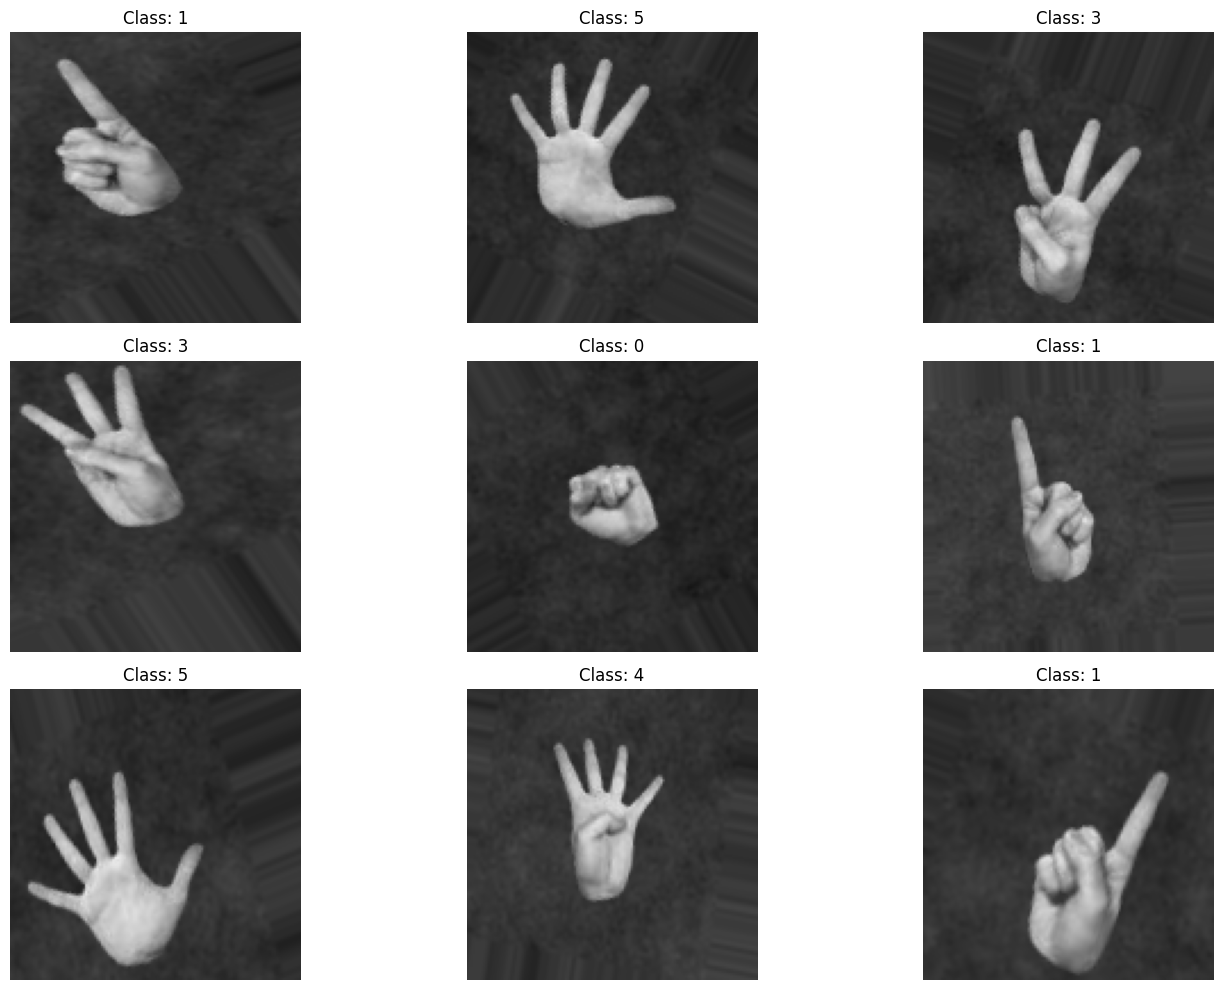

In [11]:
# TODO: Obtenha um batch de imagens do gerador de treino
images, labels = next(train_generator)
class_names = list(train_generator.class_indices.keys())

# Visualização
plt.figure(figsize=(15, 10))
for i in range(min(9, len(images))):
    plt.subplot(3, 3, i+1)
    # TODO: Mostre cada imagem com seu respectivo rótulo
    plt.imshow(images[i])
    plt.title(f"Class: {class_names[np.argmax(labels[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 5. Construção da Arquitetura do Modelo

**Tarefa:** Implemente a arquitetura sequencial completa

**Camada de Input**:
   ```python
   layers.Input((128, 128, 3))
   ```

**Primeiro Bloco Convolucional:**

* Implemente uma camada Conv2D com:
    * 32 filtros
    * Kernel size 3x3
    * Ativação ReLU
* Adicione uma camada MaxPooling2D com pool size 2x2

**Segundo Bloco Convolucional:**

* Aumente para 64 filtros
* Mantenha as mesmas configurações do primeiro bloco

**Terceiro Bloco Convolucional:**

* Aumente para 128 filtros
* Mantenha as outras configurações

**Camadas Densas (Fully Connected):**

* Adicione uma camada Flatten() para transformar os features em 1D
* Implemente Dropout de 50% para regularização
* Adicione uma Dense layer com 128 neurônios e ativação ReLU
* Finalize com uma Dense layer de saída com ativação softmax



In [ ]:
from tensorflow.keras import layers, models

num_classes = len(train_generator.class_indices)

model = models.Sequential([    
    layers.Input((128, 128, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout para evitar overfitting
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  
])

# TODO: Compile o modelo com optimizer, loss e metrics apropriados
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# 6. Treinamento e Monitoramento

**Objetivo:** Treinar o modelo com callbacks apropriados.

**Tarefas:**

* Configure os callbacks para monitorar o treinamento
* Ajuste o número de épocas conforme necessário
* Monitore tanto loss quanto accuracy

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# TODO: Implemente callbacks (EarlyStopping, ModelCheckpoint, ReduceLROnPlateau)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model_fingers.h5", monitor='val_accuracy', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6),
    TensorBoard(log_dir=log_dir, histogram_freq=1)
]

# TODO: Execute o treinamento
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    callbacks=callbacks,
    verbose=1
)

/home/octavio/anaconda3/envs/curso_visao_computacional/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.4557 - loss: 1.2196 - precision_1: 0.6916 - recall_1: 0.2953

563/563 ━━━━━━━━━━━━━━━━━━━━ 300s 529ms/step - accuracy: 0.4560 - loss: 1.2188 - precision_1: 0.6919 - recall_1: 0.2958 - val_accuracy: 0.9778 - val_loss: 0.1041 - val_precision_1: 0.9783 - val_recall_1: 0.9772 - learning_rate: 0.0010
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.9067 - loss: 0.2529 - precision_1: 0.9122 - recall_1: 0.9014

563/563 ━━━━━━━━━━━━━━━━━━━━ 309s 549ms/step - accuracy: 0.9067 - loss: 0.2528 - precision_1: 0.9122 - recall_1: 0.9015 - val_accuracy: 0.9928 - val_loss: 0.0332 - val_precision_1: 0.9928 - val_recall_1: 0.9928 - learning_rate: 0.0010
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.9446 - loss: 0.1455 - precision_1: 0.9458 - recall_1: 0.9435

563/563 ━━━━━━━━━━━━━━━━━━━━ 308s 546ms/step - accuracy: 0.9446 - loss: 0.1455 - precision_1: 0.9458 - recall_1: 0.9435 - val_accuracy: 0.9975 - val_loss: 0.0099 - val_precision_1: 0.9975 - val_recall_1: 0.9975 - learning_rate: 0.0010
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 304s 540ms/step - accuracy: 0.9657 - loss: 0.1004 - precision_1: 0.9658 - recall_1: 0.9651 - val_accuracy: 0.9878 - val_loss: 0.0335 - val_precision_1: 0.9878 - val_recall_1: 0.9878 - learning_rate: 0.0010
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.9708 - loss: 0.0835 - precision_1: 0.9711 - recall_1: 0.9707

563/563 ━━━━━━━━━━━━━━━━━━━━ 306s 544ms/step - accuracy: 0.9708 - loss: 0.0835 - precision_1: 0.9711 - recall_1: 0.9707 - val_accuracy: 0.9989 - val_loss: 0.0035 - val_precision_1: 0.9989 - val_recall_1: 0.9989 - learning_rate: 0.0010
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 319s 538ms/step - accuracy: 0.9748 - loss: 0.0727 - precision_1: 0.9748 - recall_1: 0.9747 - val_accuracy: 0.9958 - val_loss: 0.0144 - val_precision_1: 0.9958 - val_recall_1: 0.9958 - learning_rate: 0.0010
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 305s 542ms/step - accuracy: 0.9726 - loss: 0.0823 - precision_1: 0.9727 - recall_1: 0.9723 - val_accuracy: 0.9297 - val_loss: 0.1716 - val_precision_1: 0.9297 - val_recall_1: 0.9297 - learning_rate: 0.0010
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.9743 - loss: 0.0725 - precision_1: 0.9745 - recall_1: 0.9743

563/563 ━━━━━━━━━━━━━━━━━━━━ 311s 551ms/step - accuracy: 0.9743 - loss: 0.0724 - precision_1: 0.9745 - recall_1: 0.9743 - val_accuracy: 1.0000 - val_loss: 0.0018 - val_precision_1: 1.0000 - val_recall_1: 1.0000 - learning_rate: 0.0010
Epoch 9/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 314s 558ms/step - accuracy: 0.9813 - loss: 0.0543 - precision_1: 0.9813 - recall_1: 0.9813 - val_accuracy: 1.0000 - val_loss: 8.5485e-04 - val_precision_1: 1.0000 - val_recall_1: 1.0000 - learning_rate: 0.0010
Epoch 10/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 314s 557ms/step - accuracy: 0.9834 - loss: 0.0442 - precision_1: 0.9836 - recall_1: 0.9834 - val_accuracy: 1.0000 - val_loss: 0.0011 - val_precision_1: 1.0000 - val_recall_1: 1.0000 - learning_rate: 0.0010


# 7. Avaliação e Análise de Resultados

**Objetivo:** Avaliar o desempenho do modelo.

**Tarefas:**

* Identifique quais classes têm melhor/piro desempenho
* Analise os erros mais comuns na matriz de confusão
* Verifique se há overfitting

113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - accuracy: 1.0000 - loss: 7.8228e-04 - precision_1: 1.0000 - recall_1: 1.0000
Loss: 0.0009, Accuracy: 1.0000
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step


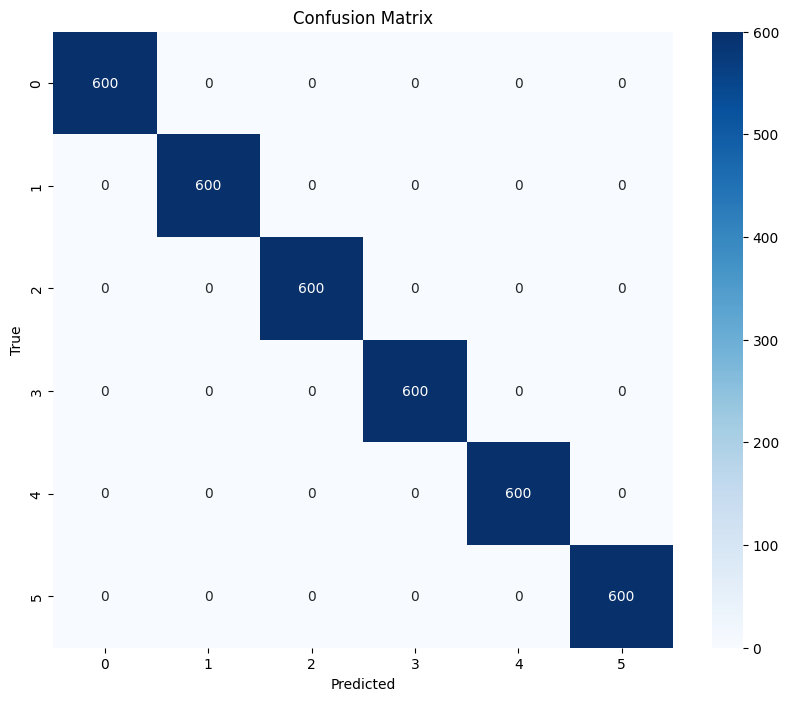


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       600
           1     1.0000    1.0000    1.0000       600
           2     1.0000    1.0000    1.0000       600
           3     1.0000    1.0000    1.0000       600
           4     1.0000    1.0000    1.0000       600
           5     1.0000    1.0000    1.0000       600

    accuracy                         1.0000      3600
   macro avg     1.0000    1.0000    1.0000      3600
weighted avg     1.0000    1.0000    1.0000      3600



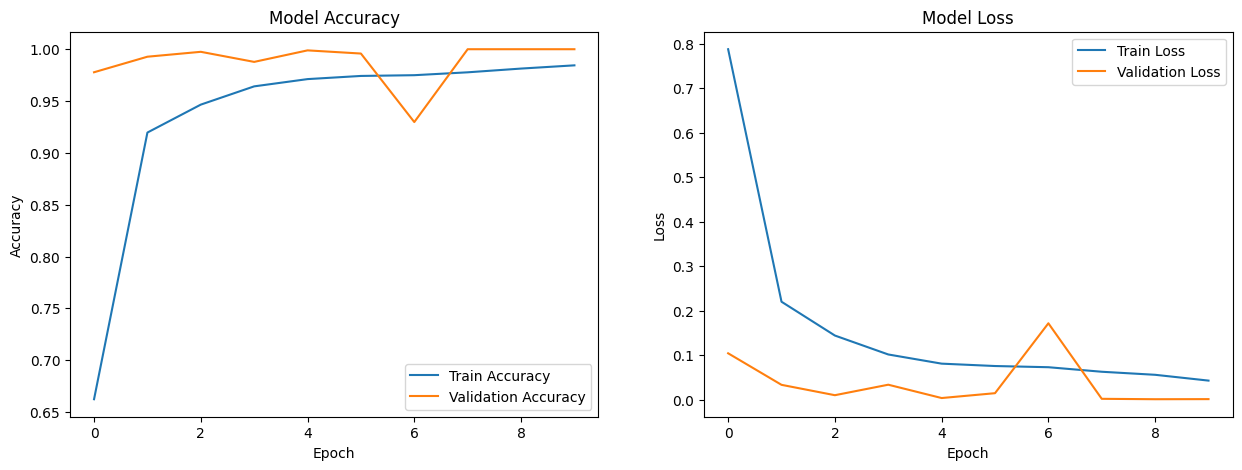

In [14]:
# Avaliação geral
results = model.evaluate(test_generator)
print(f"Loss: {results[0]:.4f}, Accuracy: {results[1]:.4f}")

# Previsões
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# TODO: Gere e mostre a matriz de confusão
# Dica: Use confusion_matrix e seaborn.heatmap()
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# TODO: Mostre o classification report
# Dica: Use classification_report do sklearn
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names, digits=4))

# TODO: Plote gráficos de accuracy e loss durante o treinamento
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()